# Projeto 3
## André Ejzenmesser
## Vinicius Bonelli

Variáveis escolhidas: Acesso a internet por 100 pessoas e IDH

Variável resposta: Indice de percepção de corrupção (Corruption Perception Index - CPI)

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/AndreEjz/Desktop/CDP3


In [2]:
d0 = pd.read_excel('Dados.xlsx', index_col=0)
d1 = pd.read_excel('CDados.xlsx', index_col=0)
d2 = pd.read_excel('Corrupcao.xlsx', index_col=0)

In [3]:
d2.head()

,CPI
Paises,
Afghanistan,1.4
Albania,3.3
Algeria,2.9
Angola,1.9
Argentina,2.9


In [4]:
d0.head()

,Internet,Celular,Renda,IDH,Saneamento,Servicos
Países,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,47.607657
Afghanistan,3.246306,34.338687,NaN,0.387,37.0,60.239255
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,30.960967
Albania,41.200000,77.167390,1857.352947,0.734,94.0,NaN
Algeria,11.230000,93.647115,2192.703976,0.691,95.0,NaN


In [5]:
dados0 = d2.join(d0, how='outer')
dados0.head()

,CPI,Internet,Celular,Renda,IDH,Saneamento,Servicos
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,47.607657
Afghanistan,1.4,3.246306,34.338687,NaN,0.387,37.0,60.239255
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,30.960967
Albania,3.3,41.200000,77.167390,1857.352947,0.734,94.0,NaN
Algeria,2.9,11.230000,93.647115,2192.703976,0.691,95.0,NaN


In [6]:
dados0=dados0[~np.isnan(dados0.CPI)]
dados0=dados0[~np.isnan(dados0.Internet)]
dados0=dados0[~np.isnan(dados0.IDH)]
dados0=dados0[~np.isnan(dados0.Celular)]
dados0=dados0[~np.isnan(dados0.Renda)]
dados0=dados0[~np.isnan(dados0.Saneamento)]
dados0=dados0[~np.isnan(dados0.Servicos)]

dados0.shape

(83, 7)

____
## Análise Descritiva

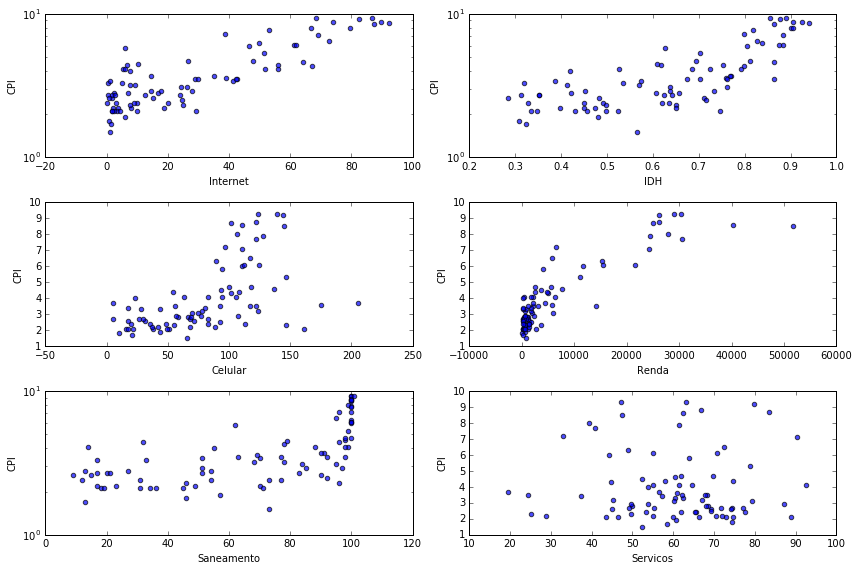

In [7]:
f, ax = plt.subplots(3,2,figsize=(12,8))
ax[0,0].scatter(dados0.Internet, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("Internet")
ax[0,0].set_ylabel("CPI")
ax[0,0].set_yscale('log')

ax[0,1].scatter(dados0.IDH, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("IDH")
ax[0,1].set_ylabel("CPI")
ax[0,1].set_yscale('log')


ax[1,0].scatter(dados0.Celular, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("Celular")
ax[1,0].set_ylabel("CPI")


ax[1,1].scatter(dados0.Renda, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("Renda")
ax[1,1].set_ylabel("CPI")


ax[2,0].scatter(dados0.Saneamento, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[2,0].set_xlabel("Saneamento")
ax[2,0].set_ylabel("CPI")
ax[2,0].set_yscale('log')


ax[2,1].scatter(dados0.Servicos, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[2,1].set_xlabel("Servicos")
ax[2,1].set_ylabel("CPI")


plt.tight_layout(1)

In [8]:
dados = d2.join(d1, how='outer')
dados.head()

,CPI,Internet,IDH
Abkhazia,NaN,NaN,NaN
Afghanistan,1.4,3.246306,0.387
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,3.3,41.200000,0.734
Algeria,2.9,11.230000,0.691


In [9]:
dados=dados[~np.isnan(dados.CPI)]
dados=dados[~np.isnan(dados.Internet)]
dados=dados[~np.isnan(dados.IDH)]

dados.shape

(162, 3)

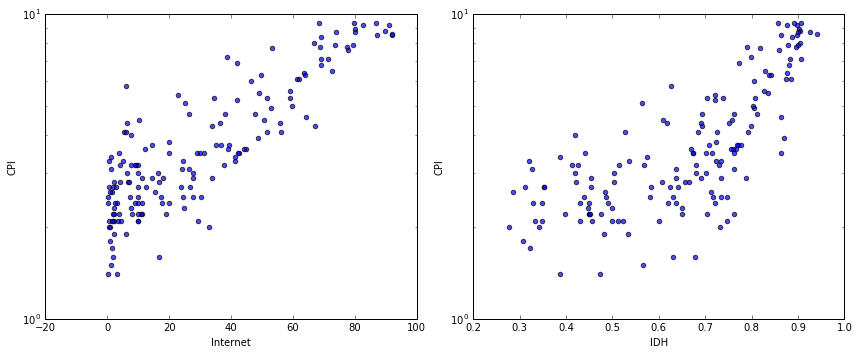

In [10]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dados.Internet, dados.CPI, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Internet")
ax[0].set_ylabel("CPI")
ax[0].set_yscale('log')

ax[1].scatter(dados.IDH, dados.CPI, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("IDH")
ax[1].set_ylabel("CPI")
ax[1].set_yscale('log')

plt.tight_layout(1)


In [11]:
dados.corr(method='pearson')

,CPI,Internet,IDH
CPI,1.000000,0.877293,0.728073
Internet,0.877293,1.000000,0.856976
IDH,0.728073,0.856976,1.000000


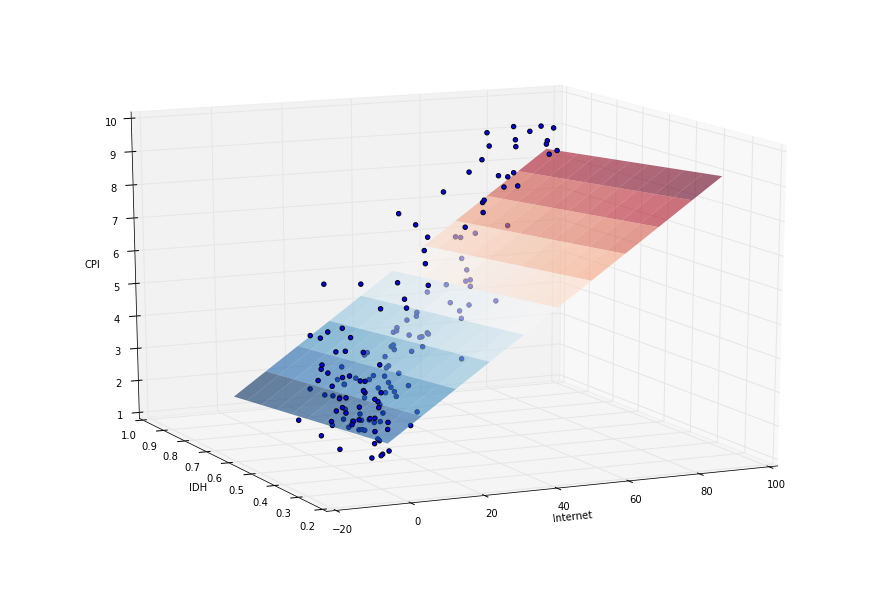

In [12]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Internet', 'IDH']]
y = dados['CPI']

## fit a OLS model with intercept on TV and Radio
X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.Internet.min(), X.Internet.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Internet, X[resid >= 0].IDH, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Internet, X[resid < 0].IDH, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Internet')
ax.set_ylabel('IDH')
ax.set_zlabel('CPI')

In [13]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.CPI
X=dados.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     268.8
Date:                Tue, 29 Nov 2016   Prob (F-statistic):           9.80e-52
Time:                        09:05:09   Log-Likelihood:                -231.94
No. Observations:                 162   AIC:                             469.9
Df Residuals:                     159   BIC:                             479.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.5024      0.441      5.676      0.000         1.632     3.373
Internet       0.0755      0.006     12.976      0.000         0.064     0.087
IDH           -1.0665      0.877     -1.216      0.226        -2.798     0.665
==============================================================================
Omnibus:                        5.939   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.508
Skew:                           0.414   Prob(JB):                       0.0637
Kurtosis:                       3.362   Cond. No.                         486.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(3.5810675680208668,
 0.61115813654311135,
 0.70527749686878338,
 0.62029338937127543)

_______
_______
_______

In [15]:
X = 'Internet'
Y = 'CPI'
n = len(dados[X])

In [16]:
media_x = 0
media_y = 0
soma_xy = 0
soma_x2 = 0

for i in range (n):
    media_x += dados[X][i]/n
    media_y += dados[Y][i]/n
    soma_xy += dados[X][i]*dados[Y][i]
    soma_x2 += dados[X][i]**2

B1 = (soma_xy - n*media_x*media_y)/(soma_x2 - n*((media_x)**2))
print('B1 =',B1)

B1 = 0.0693905895358


In [17]:
B0 = -B1*media_x + media_y
print('B0 =',B0)

B0 = 1.98634578963


In [18]:
variancia_x = 0
variancia_y = 0
for i in range (n):
    variancia_x += (dados[X][i] - media_x)**2
    variancia_y += (dados[Y][i] - media_y)**2
    
dp_x = np.sqrt(variancia_x)
dp_y = np.sqrt(variancia_y)
correlacao_xy = dp_y/dp_x
print("Correlação(XY) =", correlacao_xy)

Correlação(XY) = 0.0790962406425


In [19]:
#teste de hipoteses
#b1/(sigma**2/Sxx)**1/2 = t0
#tcritico - ver tabela
